# TD MAUP - M2 IGAST - CORRECTION

## Compréhension du phénomène à travers un cas pratique

Nous allons maintenant illustrer le phénomène du MAUP en analysant le jeu de données sur le taux de boisement en France à différentes échelles géographiques.

---


# 1 - Chargement et structure des données

L'objectif de cette section est de charger les données géographiques sur le taux de boisement en France à différentes échelles d'agrégation :

- **Communes**
- **EPCI** (Établissements Publics de Coopération Intercommunale)
- **Départements**
- **Anciennes régions** (avant 2016)
- **Nouvelles régions** (après 2016)


## 1.1 - Communes : *com_foret*

> `📝` Chargez les données pour les communes dans un dataframe *com_foret*
>
> `📝` Calculez le taux de boisement dans une nouvelle colonne *txbois* du dataframe
>
> `📝` Examinez la structure du dataframe avec `head()`, `info()` ou `describe()`


In [18]:
# On utilise geopandas pour charger des géométries dans un GeoDataFrame
# https://geopandas.org/
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mapclassify as mc
import numpy as np

# Configuration de seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Chemin vers les données communes
url_com = "https://github.com/fbxyz/M2_IGAST/raw/master/data/MAUP_COM_FORET_3857.geojson"

# Charger le fichier GeoJSON des communes
com_foret = gpd.read_file(url_com)

# On change la projection vers Lambert-93 (EPSG:2154)
com_foret = com_foret.to_crs(epsg=2154)

# Calculer le taux de boisement
com_foret['txbois'] = round((com_foret['surface_foret'] / com_foret['surface_com']) * 100, 1)

# Afficher les premières lignes
print(com_foret.head())


  insee_dep insee_com insee_epci  surface_com  surface_foret  txbois  \
0        57     57660  245700372        360.1           26.6     7.4   
1        57     57537  245700372        503.3          218.6    43.4   
2        57     57069  200067650        553.0          183.4    33.2   
3        57     57638  245700372        404.9          205.2    50.7   
4        57     57460  200067650        527.6          198.3    37.6   

   insee_old_reg  insee_reg                                           geometry  
0             41         44  POLYGON ((988031.182 6907921.772, 987265.021 6...  
1             41         44  POLYGON ((982995.212 6908239.591, 982080.308 6...  
2             41         44  POLYGON ((965355.98 6912175.257, 965908.774 69...  
3             41         44  POLYGON ((985759.256 6907385.167, 986364.442 6...  
4             41         44  POLYGON ((965434.878 6911098.752, 965828.831 6...  


## 1.2 - EPCI : *epci_foret*

> `📝` Chargez les données pour les EPCI dans un dataframe *epci_foret*
>
> `📝` Calculez le taux de boisement dans une nouvelle colonne *txbois* du dataframe
>
> `📝` Examinez la structure du dataframe


In [19]:
# Chemin vers les données EPCI
url_epci = "https://github.com/fbxyz/M2_IGAST/raw/master/data/MAUP_EPCI_FORET_3857.geojson"

# Charger les données EPCI
epci_foret = gpd.read_file(url_epci)

# Transformer en Lambert-93
epci_foret = epci_foret.to_crs(epsg=2154)

# Calculer le taux de boisement
epci_foret['txbois'] = round((epci_foret['surface_foret'] / epci_foret['surface_epci']) * 100, 1)

# Afficher les premières lignes
print(epci_foret.head())
print(epci_foret.info())


  insee_epci  surface_epci  surface_foret  \
0  200000172       15093.2         8774.0   
1  200000438       32715.2         4953.9   
2  200000545       10490.4         1930.4   
3  200000628       15054.5         4064.5   
4  200000800       34249.6        23966.0   

                                            geometry  txbois  
0  POLYGON ((966699.222 6551652.313, 966715.678 6...    58.1  
1  POLYGON ((314745.124 6710409.391, 314662.62 67...    15.1  
2  POLYGON ((751181.868 6818894.871, 750836.972 6...    18.4  
3  POLYGON ((841830.775 6349693.23, 842089.079 63...    27.0  
4  POLYGON ((631223.941 6720656.595, 631024.002 6...    70.0  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   insee_epci     1233 non-null   object  
 1   surface_epci   1233 non-null   float64 
 2   surface_foret  1233 non-null   float64 
 3   geometr

## 1.3 - Départements : *dep_foret*

> `📝` Chargez les données pour les départements dans un dataframe *dep_foret*
>
> `📝` Calculez le taux de boisement dans une nouvelle colonne *txbois* du dataframe
>
> `📝` Examinez la structure du dataframe


In [20]:
# Chemin vers les données des départements
url_dep = "https://github.com/fbxyz/M2_IGAST/raw/master/data/MAUP_DEP_FORET_3857.geojson"

# Charger les données départements
dep_foret = gpd.read_file(url_dep)

# Transformer en Lambert-93
dep_foret = dep_foret.to_crs(epsg=2154)

# Calculer le taux de boisement
dep_foret['txbois'] = round((dep_foret['surface_foret'] / dep_foret['surface_dept']) * 100, 1)

# Afficher les premières lignes
print(dep_foret.head())
print(dep_foret.info())


  insee_dep  surface_dept  surface_foret  \
0        01      577335.6       209224.2   
1        02      741859.4       165204.0   
2        03      736566.0       150932.5   
3        04      699418.7       435094.8   
4        05      568502.8       263752.5   

                                            geometry  txbois  
0  POLYGON ((840306.355 6534710.177, 839960.83 65...    36.2  
1  MULTIPOLYGON (((717935.17 6875201.125, 717532....    22.3  
2  POLYGON ((672840.839 6557971.46, 672252.638 65...    20.5  
3  POLYGON ((922157.379 6296142.895, 922100.523 6...    62.2  
4  POLYGON ((922173.516 6349244.434, 921867.119 6...    46.4  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   insee_dep      96 non-null     object  
 1   surface_dept   96 non-null     float64 
 2   surface_foret  96 non-null     float64 
 3   geometry       96

## 1.4 - Anciennes régions : *oldreg_foret*

> `📝` Chargez les données pour les anciennes régions dans un dataframe *oldreg_foret*
>
> `📝` Calculez le taux de boisement dans une nouvelle colonne *txbois* du dataframe
>
> `📝` Examinez la structure du dataframe


In [21]:
# Chemin vers les données des anciennes régions
url_oldreg = "https://github.com/fbxyz/M2_IGAST/raw/master/data/MAUP_OLDREG_FORET_3857.geojson"

# Charger les données anciennes régions
oldreg_foret = gpd.read_file(url_oldreg)

# Transformer en Lambert-93
oldreg_foret = oldreg_foret.to_crs(epsg=2154)

# Calculer le taux de boisement
oldreg_foret['txbois'] = round((oldreg_foret['surface_foret'] / oldreg_foret['surface_oldreg']) * 100, 1)

# Afficher les premières lignes
print(oldreg_foret.head())
print(oldreg_foret.info())


   insee_old_reg  surface_oldreg  surface_foret  \
0             11       1189287.7       303257.5   
1             21       2571632.4       745872.8   
2             22       1944771.5       376607.0   
3             23       1226968.5       247065.7   
4             24       3943557.3      1027869.8   

                                            geometry  txbois  
0  POLYGON ((606471.62 6831338.105, 606090.247 68...    25.5  
1  POLYGON ((748824.56 6785018.377, 748570.219 67...    29.0  
2  POLYGON ((608135.6 6898628.071, 608446.235 689...    19.4  
3  MULTIPOLYGON (((512503.227 6868245.97, 512402....    20.1  
4  POLYGON ((498277.637 6651877.068, 497647.314 6...    26.1  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   insee_old_reg   22 non-null     int32   
 1   surface_oldreg  22 non-null     float64 
 2   surface_foret   

## 1.5 - Nouvelles régions : *reg_foret*

> `📝` Chargez les données pour les nouvelles régions dans un dataframe *reg_foret*
>
> `📝` Calculez le taux de boisement dans une nouvelle colonne *txbois* du dataframe
>
> `📝` Examinez la structure du dataframe


In [22]:
# Chemin vers les données des nouvelles régions
url_reg = "https://github.com/fbxyz/M2_IGAST/raw/master/data/MAUP_REG_FORET_3857.geojson"

# Charger les données nouvelles régions
reg_foret = gpd.read_file(url_reg)

# Transformer en Lambert-93
reg_foret = reg_foret.to_crs(epsg=2154)

# Calculer le taux de boisement
reg_foret['txbois'] = round((reg_foret['surface_foret'] / reg_foret['surface_reg']) * 100, 1)

# Afficher les premières lignes
print(reg_foret.head())
print(reg_foret.info())


   insee_reg  surface_reg  surface_foret  \
0         11    1189287.7       303257.5   
1         24    3943557.3      1027869.8   
2         27    4797913.1      1830316.6   
3         28    2997738.4       451165.3   
4         32    3188565.7       519802.9   

                                            geometry  txbois  
0  POLYGON ((606471.62 6831338.105, 606090.247 68...    25.5  
1  POLYGON ((498277.637 6651877.068, 497647.314 6...    26.1  
2  POLYGON ((715623.937 6619888.403, 715142.156 6...    38.1  
3  MULTIPOLYGON (((371453.804 6829839.29, 371363....    15.1  
4  POLYGON ((608135.6 6898628.071, 608446.235 689...    16.3  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   insee_reg      13 non-null     int32   
 1   surface_reg    13 non-null     float64 
 2   surface_foret  13 non-null     float64 
 3   geometry       13

---

# 2 - Cartographie des données

Pour illustrer les différents effets du MAUP, vous allez cartographier le même taux de boisement en France, mais à différents maillages.

## Objectif :

> `📝` Créer une carte choroplèthe pour chaque niveau d'agrégation
>
> `📝` Appliquer vos connaissances sur la discrétisation pour un rendu efficace
>
> `📝` Observer les différences de représentation spatiale
>
> `📝` Consultez l'aide de mapclassify si besoin : <https://pysal.org/mapclassify/>


## 2.1 - Carte par communes


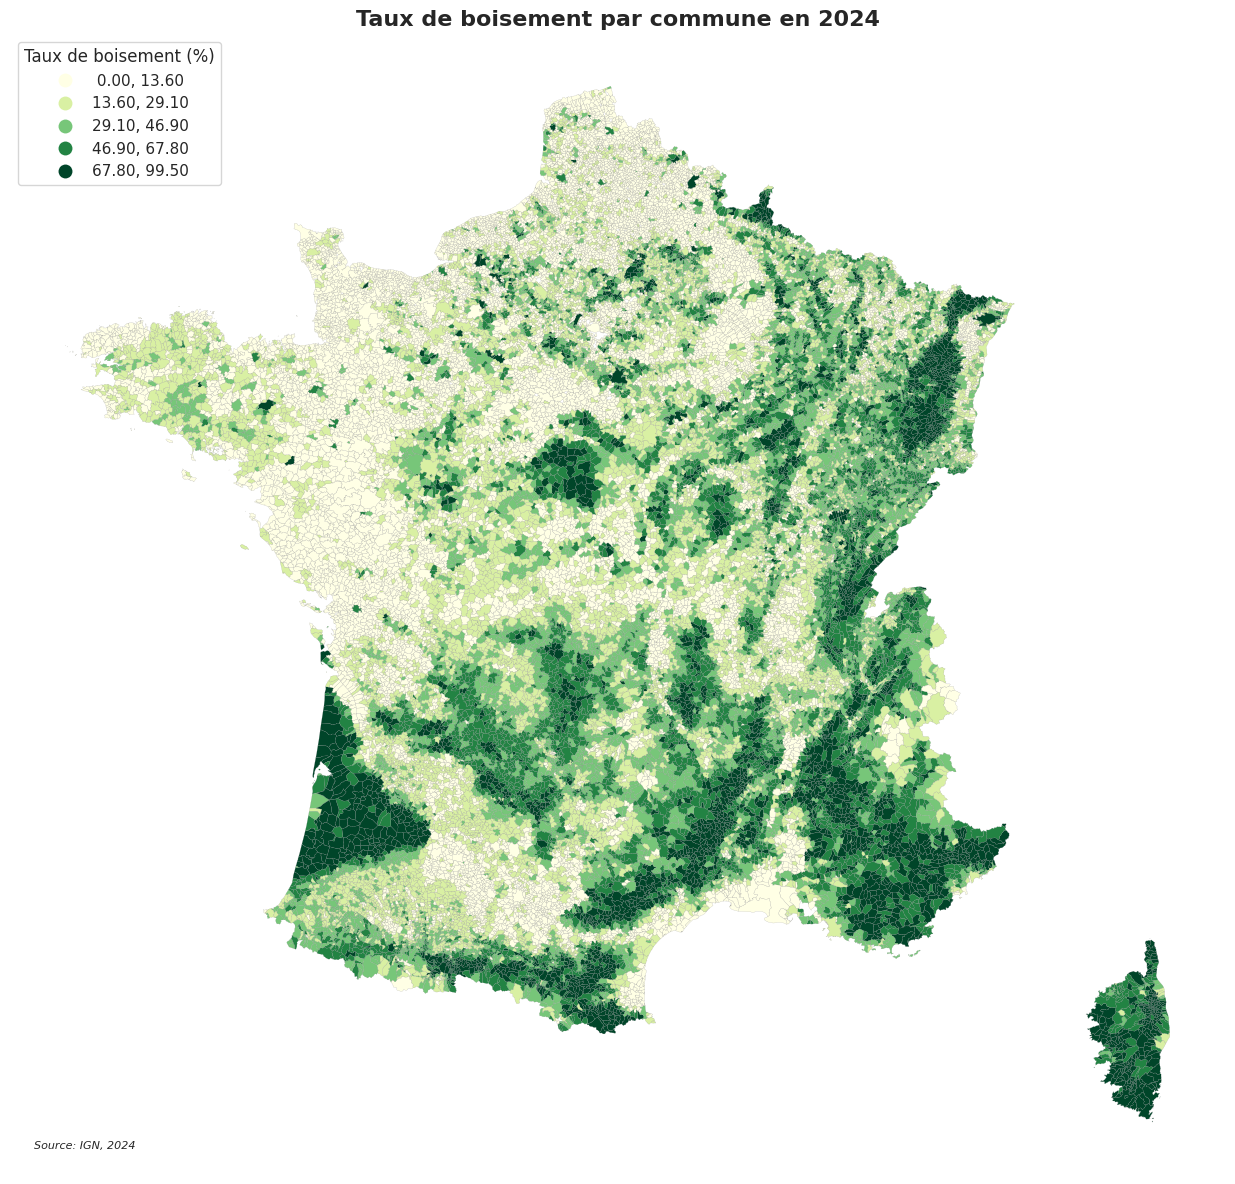

In [23]:
# ÉTAPE 1 : Créer une figure avec matplotlib
# figsize=(15, 12) définit la taille de la carte en pouces (largeur, hauteur)
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

# ÉTAPE 2 : Classifier les données avec Fisher-Jenks (Natural Breaks)
# Cette méthode minimise la variance intra-classe et maximise la variance inter-classe
# k=5 : on crée 5 classes de valeurs
classifier = mc.FisherJenks(com_foret['txbois'], k=5)

# ÉTAPE 3 : Créer la carte choroplèthe avec geopandas
com_foret.plot(
    column='txbois',                              # Variable à cartographier
    cmap='YlGn',                                  # Palette de couleurs (Yellow-Green)
    classification_kwds={'bins': classifier.bins}, # Utiliser les classes calculées
    scheme='user_defined',                        # Méthode de discrétisation personnalisée
    legend=True,                                  # Afficher la légende
    ax=ax,                                        # Utiliser l'axe créé précédemment
    edgecolor='grey',                             # Couleur des contours
    linewidth=0.1,                                # Épaisseur des contours (en points)
    legend_kwds={                                 # Paramètres de la légende
        'title': 'Taux de boisement (%)',        # Titre de la légende
        'loc': 'upper left',                      # Position de la légende
        'frameon': True                           # Afficher un cadre autour de la légende
    }
)

# ÉTAPE 4 : Personnaliser la carte
ax.set_title('Taux de boisement par commune en 2024', fontsize=16, fontweight='bold')
ax.axis('off')  # Masquer les axes x et y
ax.text(0.02, 0.02, 'Source: IGN, 2024',
        transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', style='italic')

plt.tight_layout()  # Ajuster automatiquement les espacements
plt.show()


## 2.2 - Carte par EPCI

> `📝` En vous aidant de l'exemple précédent, cartographiez le taux de boisement pour les EPCI
>
> `📝` Choisissez une méthode de discrétisation adaptée (quantiles, natural_breaks, fisher_jenks, etc.)
>
> `📝` Comparez visuellement avec la carte des communes


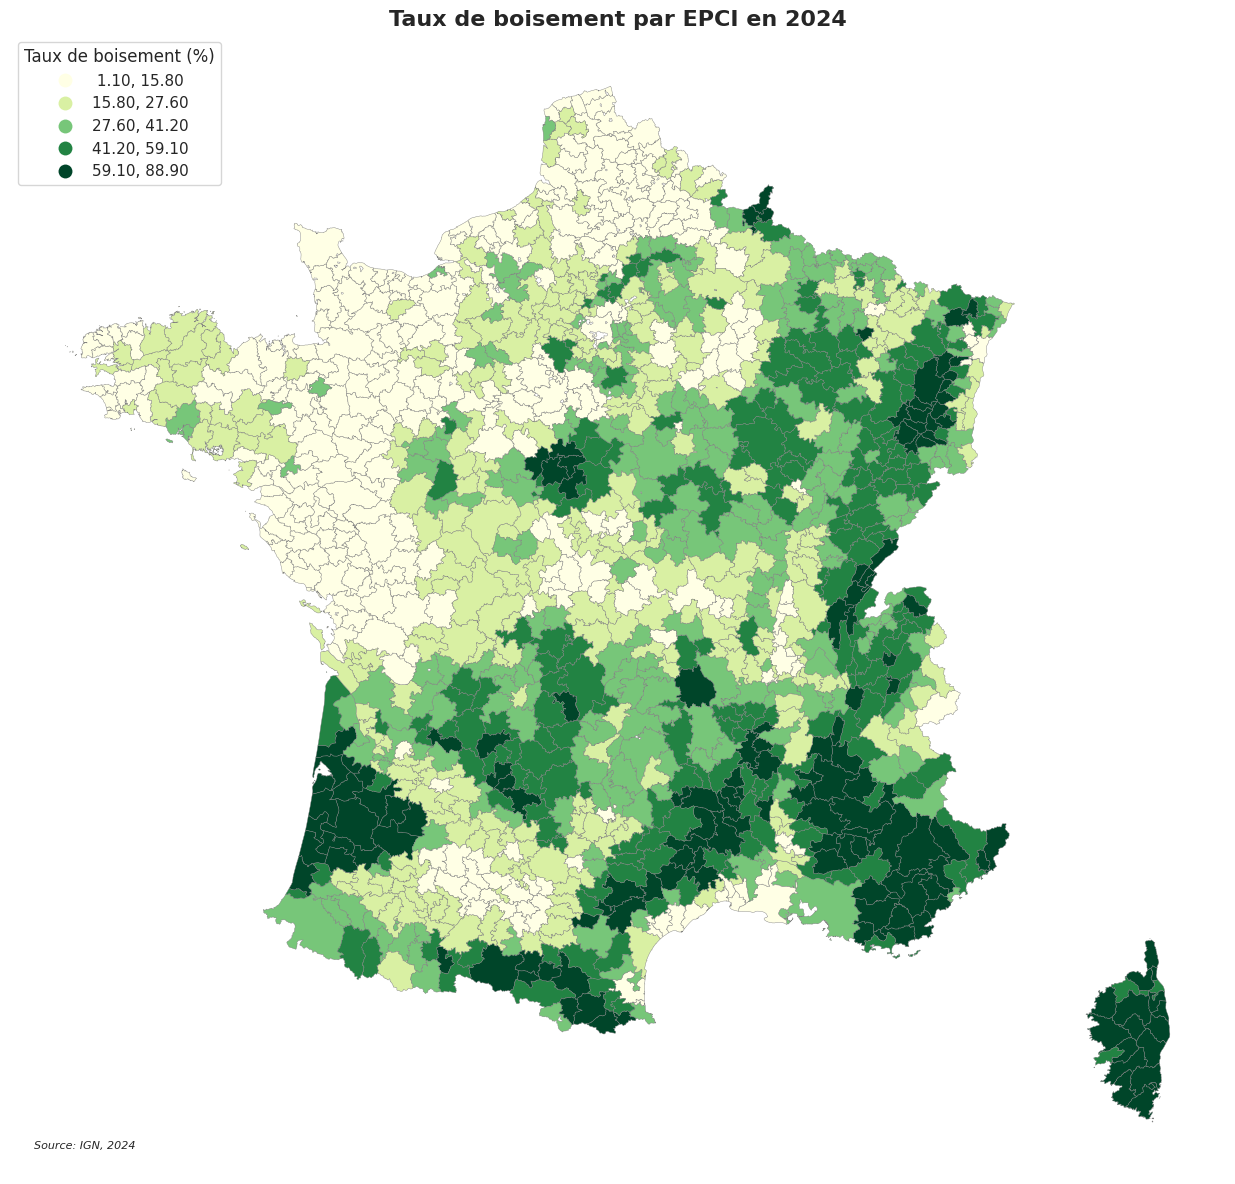

In [24]:
# Créer une figure pour les EPCI
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Appliquer une classification de Fisher-Jenks
classifier = mc.FisherJenks(epci_foret['txbois'], k=5)

# Créer la carte choroplèthe
epci_foret.plot(column='txbois',
                cmap='YlGn',
                classification_kwds={'bins': classifier.bins},
                scheme='user_defined',
                legend=True,
                ax=ax,
                edgecolor='grey',
                linewidth=0.3,
                legend_kwds={'title': 'Taux de boisement (%)',
                            'loc': 'upper left',
                            'frameon': True})

# Personnaliser la carte
ax.set_title('Taux de boisement par EPCI en 2024', fontsize=16, fontweight='bold')
ax.axis('off')
ax.text(0.02, 0.02, 'Source: IGN, 2024',
        transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', style='italic')

plt.tight_layout()
plt.show()


## 2.3 - Carte par Départements

> `📝` Cartographiez le taux de boisement pour les départements


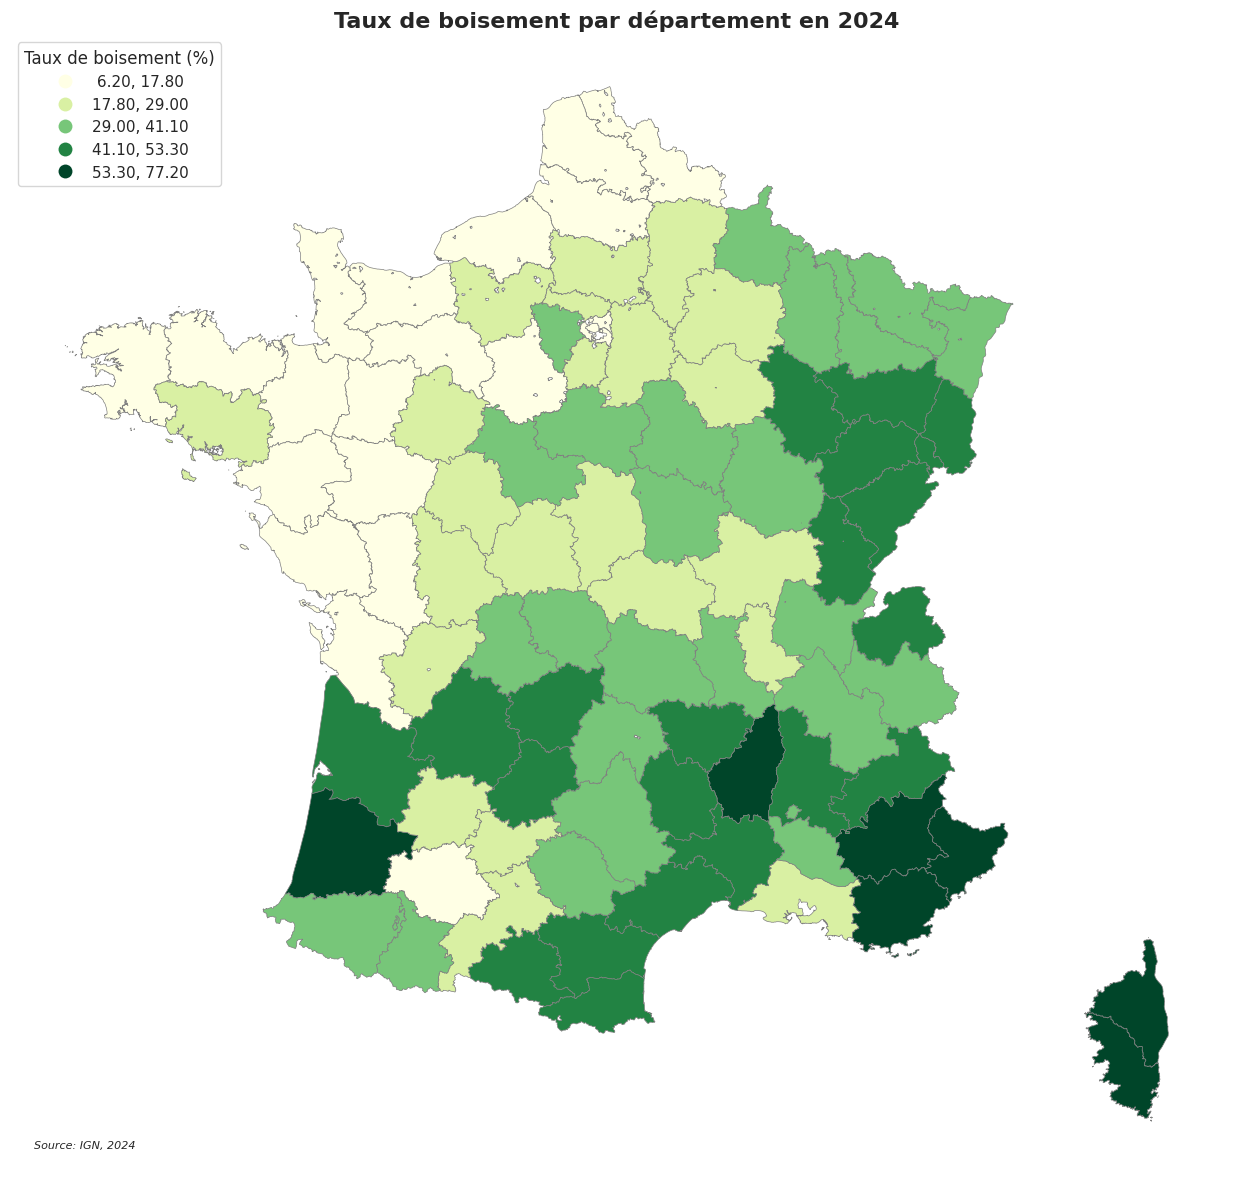

In [25]:
# Créer une figure pour les départements
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Appliquer une classification de Fisher-Jenks
classifier = mc.FisherJenks(dep_foret['txbois'], k=5)

# Créer la carte choroplèthe
dep_foret.plot(column='txbois',
               cmap='YlGn',
               classification_kwds={'bins': classifier.bins},
               scheme='user_defined',
               legend=True,
               ax=ax,
               edgecolor='grey',
               linewidth=0.5,
               legend_kwds={'title': 'Taux de boisement (%)',
                           'loc': 'upper left',
                           'frameon': True})

# Personnaliser la carte
ax.set_title('Taux de boisement par département en 2024', fontsize=16, fontweight='bold')
ax.axis('off')
ax.text(0.02, 0.02, 'Source: IGN, 2024',
        transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', style='italic')

plt.tight_layout()
plt.show()


## 2.4 - Carte par Anciennes régions

> `📝` Cartographiez le taux de boisement pour les anciennes régions


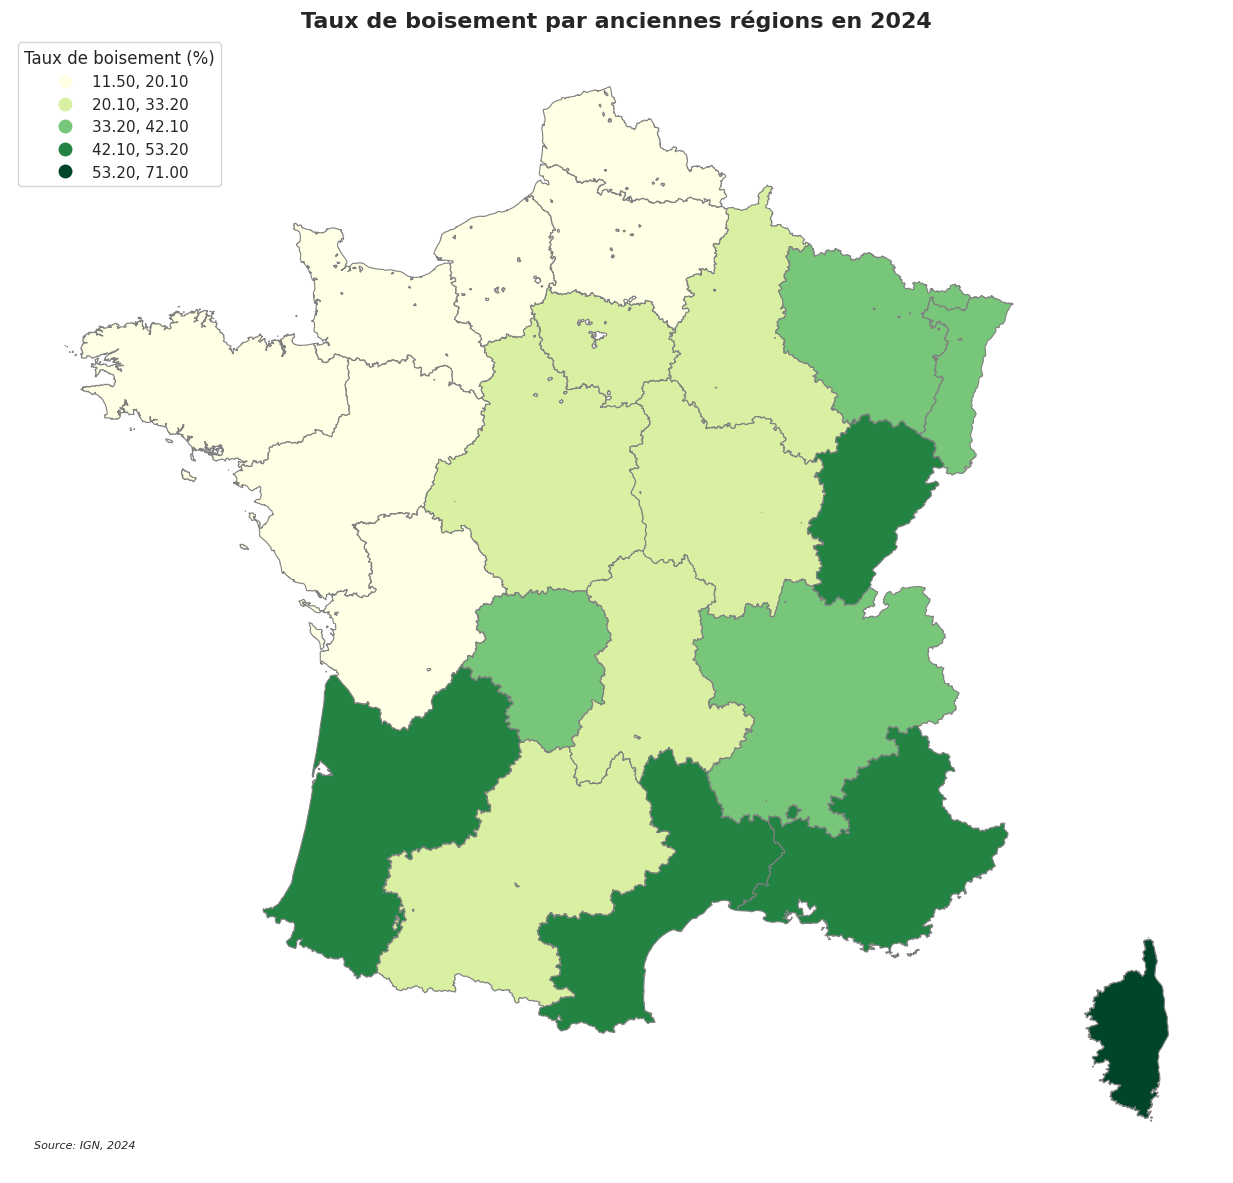

In [26]:
# Créer une figure pour les anciennes régions
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Appliquer une classification de Fisher-Jenks
classifier = mc.FisherJenks(oldreg_foret['txbois'], k=5)

# Créer la carte choroplèthe
oldreg_foret.plot(column='txbois',
                  cmap='YlGn',
                  classification_kwds={'bins': classifier.bins},
                  scheme='user_defined',
                  legend=True,
                  ax=ax,
                  edgecolor='grey',
                  linewidth=0.8,
                  legend_kwds={'title': 'Taux de boisement (%)',
                              'loc': 'upper left',
                              'frameon': True})

# Personnaliser la carte
ax.set_title('Taux de boisement par anciennes régions en 2024', fontsize=16, fontweight='bold')
ax.axis('off')
ax.text(0.02, 0.02, 'Source: IGN, 2024',
        transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', style='italic')

plt.tight_layout()
plt.show()


## 2.5 - Carte par Nouvelles régions

> `📝` Cartographiez le taux de boisement pour les nouvelles régions


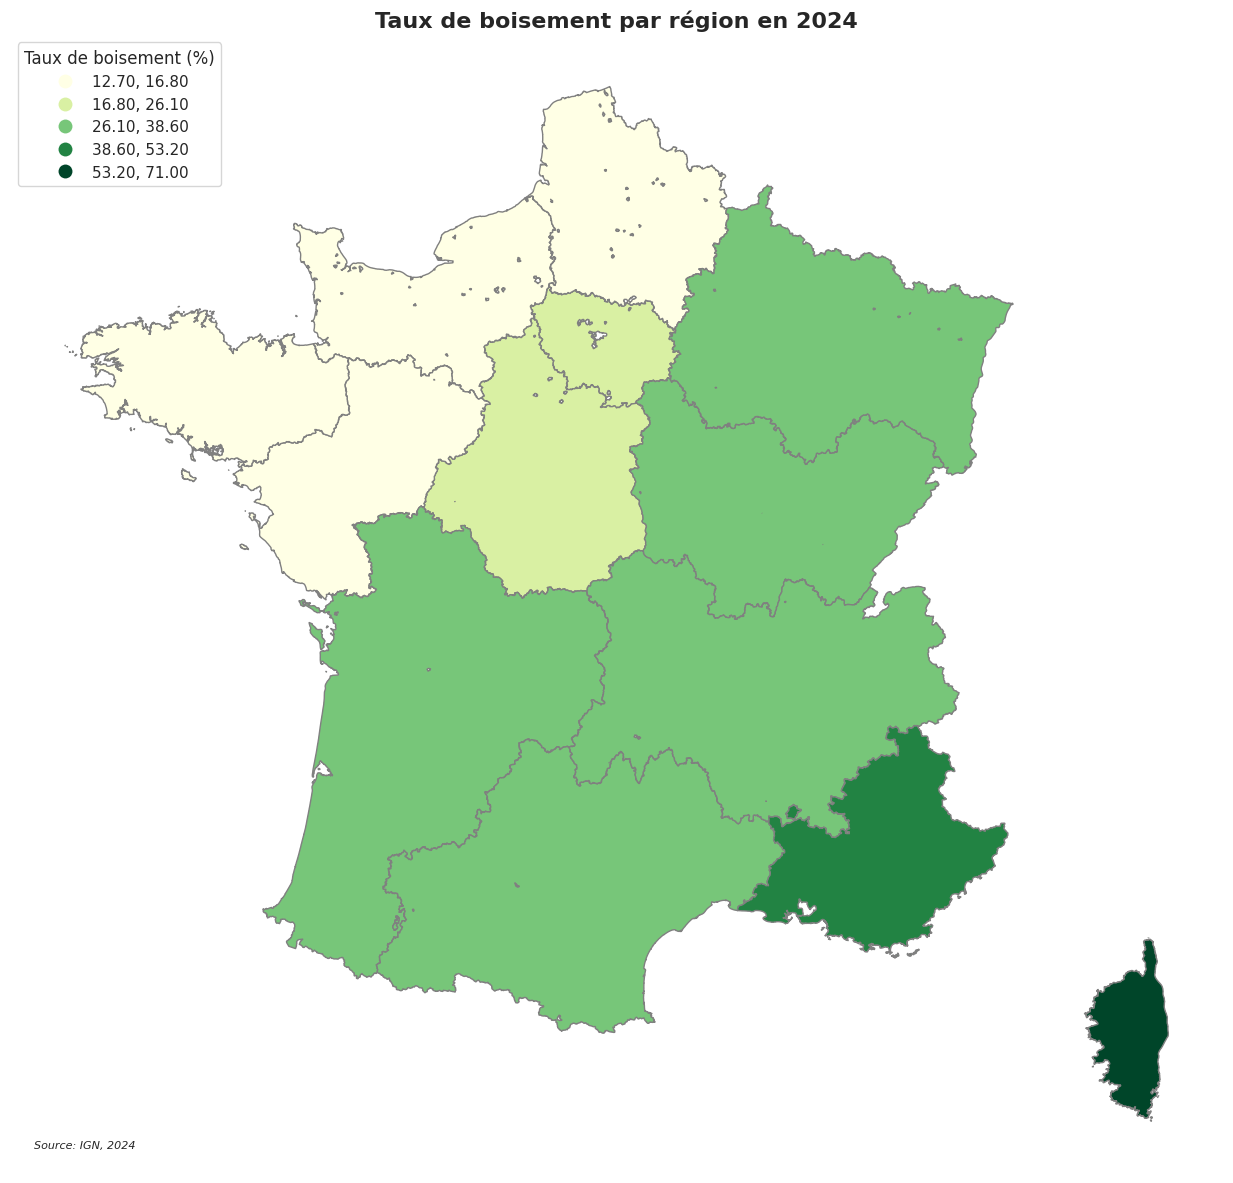

In [27]:
# Créer une figure pour les nouvelles régions
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Appliquer une classification de Fisher-Jenks
classifier = mc.FisherJenks(reg_foret['txbois'], k=5)

# Créer la carte choroplèthe
reg_foret.plot(column='txbois',
               cmap='YlGn',
               classification_kwds={'bins': classifier.bins},
               scheme='user_defined',
               legend=True,
               ax=ax,
               edgecolor='grey',
               linewidth=1.0,
               legend_kwds={'title': 'Taux de boisement (%)',
                           'loc': 'upper left',
                           'frameon': True})

# Personnaliser la carte
ax.set_title('Taux de boisement par région en 2024', fontsize=16, fontweight='bold')
ax.axis('off')
ax.text(0.02, 0.02, 'Source: IGN, 2024',
        transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', style='italic')

plt.tight_layout()
plt.show()


## 2.6 - Questions de réflexion

> `📝` **Question 1 :** Qu'observez-vous sur la répartition du taux de boisement à différentes échelles d'agrégation ?
>
> `📝` **Question 2 :** Les zones identifiées comme fortement boisées restent-elles les mêmes selon l'échelle ?
>
> `📝` **Question 3 :** Quel niveau d'agrégation vous semble le plus pertinent pour étudier le taux de boisement ? Pourquoi ?


**Réponses :**

1. À mesure que l'échelle d'agrégation augmente (de la commune vers la région), on observe un lissage progressif des variations spatiales. Les contrastes locaux s'atténuent et la carte devient plus homogène.

2. Certaines grandes zones boisées (comme les Landes, le Massif Central forestier) restent identifiables à toutes les échelles, mais les nuances locales disparaissent progressivement.

3. Le niveau pertinent dépend de l'objectif de l'étude : l'échelle communale pour des politiques locales d'aménagement, l'échelle régionale pour des politiques nationales de gestion forestière. Il n'y a pas de "bonne" échelle absolue, d'où l'importance du MAUP.



---

# 3 - Analyse univariée

En utilisant les acquis des cours précédents, réalisez l'analyse univariée du taux de boisement pour chaque maillage.

## Objectifs :

> `📝` Calculez les valeurs centrales (moyenne, médiane) et les paramètres de dispersion (écart-type, min, max, quartiles)
>
> `📝` Créez des boxplots pour comparer les distributions
>
> `📝` Analysez l'évolution des statistiques selon l'échelle d'agrégation


## 3.1 - Communes

Exemple d'analyse pour les communes :


=== COMMUNES ===
count    34696.000000
mean        28.878897
std         23.179696
min          0.000000
25%          9.800000
50%         22.900000
75%         43.500000
max         99.500000
Name: txbois, dtype: float64

Écart-type : 23.18


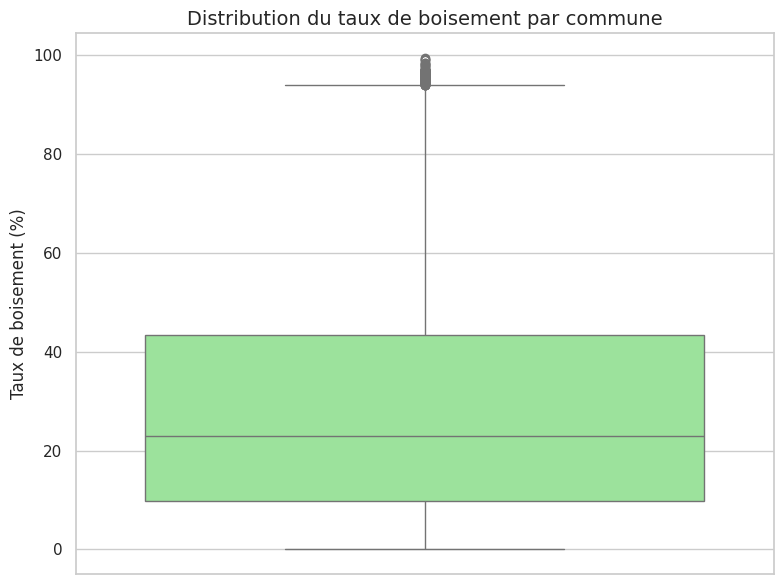

In [28]:
# Statistiques descriptives pour les communes
print("=== COMMUNES ===")
print(com_foret['txbois'].describe())

# Calcul de l'écart-type
print(f"\nÉcart-type : {com_foret['txbois'].std():.2f}")

# Boxplot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(y=com_foret['txbois'], ax=ax, color='lightgreen')
ax.set_title('Distribution du taux de boisement par commune', fontsize=14)
ax.set_ylabel('Taux de boisement (%)')
plt.tight_layout()
plt.show()


## 3.2 - EPCI

> `📝` Réalisez l'analyse univariée pour les EPCI


=== EPCI ===
count    1233.000000
mean       31.775669
std        19.599798
min         1.100000
25%        16.300000
50%        27.400000
75%        45.300000
max        88.900000
Name: txbois, dtype: float64

Écart-type : 19.60


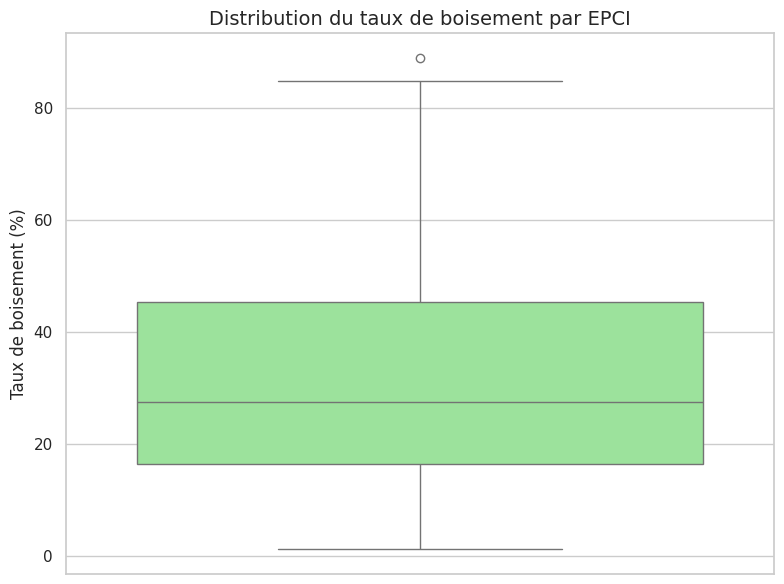

In [29]:
# Statistiques descriptives pour EPCI
print("=== EPCI ===")
print(epci_foret['txbois'].describe())

# Calcul de l'écart-type
print(f"\nÉcart-type : {epci_foret['txbois'].std():.2f}")

# Boxplot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(y=epci_foret['txbois'], ax=ax, color='lightgreen')
ax.set_title('Distribution du taux de boisement par EPCI', fontsize=14)
ax.set_ylabel('Taux de boisement (%)')
plt.tight_layout()
plt.show()


## 3.3 - Départements

> `📝` Réalisez l'analyse univariée pour les départements


=== DÉPARTEMENTS ===
count    96.000000
mean     32.360417
std      15.997819
min       6.200000
25%      20.500000
50%      31.400000
75%      44.350000
max      77.200000
Name: txbois, dtype: float64

Écart-type : 16.00


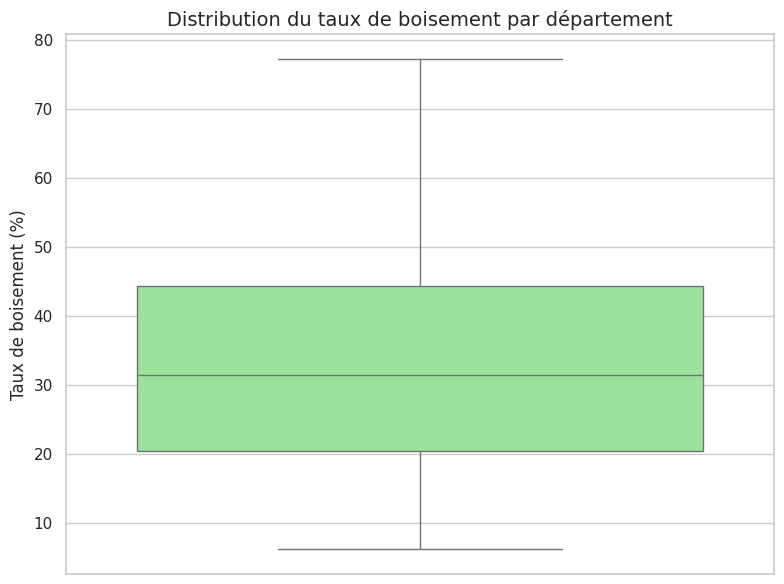

In [30]:
# Statistiques descriptives pour départements
print("=== DÉPARTEMENTS ===")
print(dep_foret['txbois'].describe())

# Calcul de l'écart-type
print(f"\nÉcart-type : {dep_foret['txbois'].std():.2f}")

# Boxplot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(y=dep_foret['txbois'], ax=ax, color='lightgreen')
ax.set_title('Distribution du taux de boisement par département', fontsize=14)
ax.set_ylabel('Taux de boisement (%)')
plt.tight_layout()
plt.show()


## 3.4 - Anciennes régions

> `📝` Réalisez l'analyse univariée pour les anciennes régions


=== ANCIENNES RÉGIONS ===
count    22.000000
mean     32.563636
std      15.486047
min      11.500000
25%      19.575000
50%      32.600000
75%      42.000000
max      71.000000
Name: txbois, dtype: float64

Écart-type : 15.49


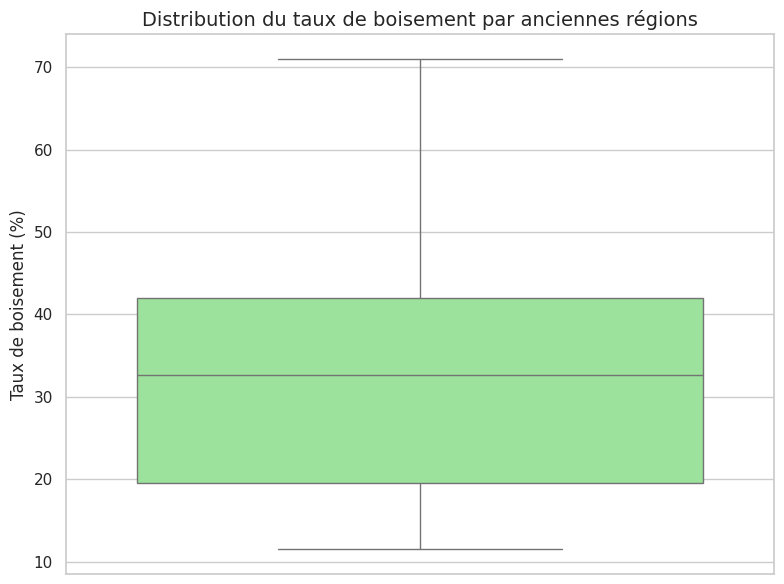

In [31]:
# Statistiques descriptives pour anciennes régions
print("=== ANCIENNES RÉGIONS ===")
print(oldreg_foret['txbois'].describe())

# Calcul de l'écart-type
print(f"\nÉcart-type : {oldreg_foret['txbois'].std():.2f}")

# Boxplot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(y=oldreg_foret['txbois'], ax=ax, color='lightgreen')
ax.set_title('Distribution du taux de boisement par anciennes régions', fontsize=14)
ax.set_ylabel('Taux de boisement (%)')
plt.tight_layout()
plt.show()


## 3.5 - Nouvelles régions

> `📝` Réalisez l'analyse univariée pour les nouvelles régions


=== NOUVELLES RÉGIONS ===
count    13.000000
mean     32.538462
std      16.649001
min      12.700000
25%      16.800000
50%      35.300000
75%      38.200000
max      71.000000
Name: txbois, dtype: float64

Écart-type : 16.65


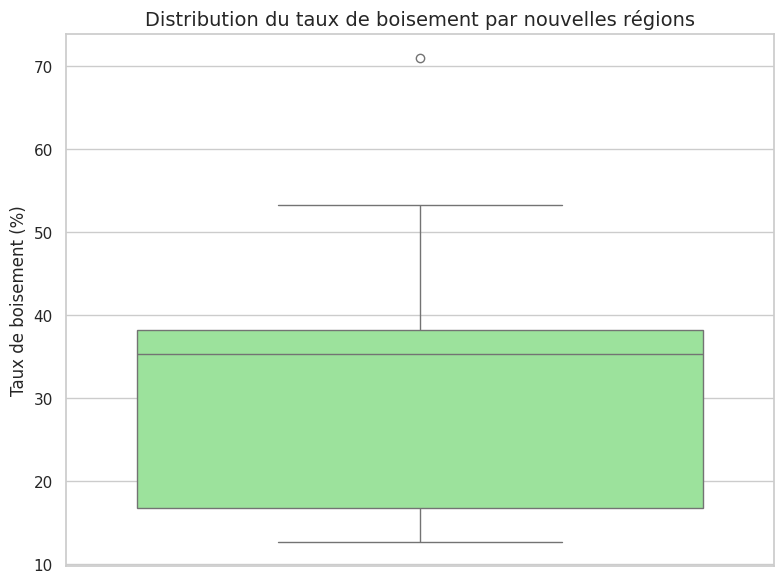

In [32]:
# Statistiques descriptives pour nouvelles régions
print("=== NOUVELLES RÉGIONS ===")
print(reg_foret['txbois'].describe())

# Calcul de l'écart-type
print(f"\nÉcart-type : {reg_foret['txbois'].std():.2f}")

# Boxplot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(y=reg_foret['txbois'], ax=ax, color='lightgreen')
ax.set_title('Distribution du taux de boisement par nouvelles régions', fontsize=14)
ax.set_ylabel('Taux de boisement (%)')
plt.tight_layout()
plt.show()


## 3.6 - Comparaison visuelle

> `📝` **Bonus :** Créez un graphique comparatif avec tous les boxplots côte à côte


            Maillage    Moyenne  Médiane  Écart-type
0           Communes  28.878897     22.9   23.179696
1               EPCI  31.775669     27.4   19.599798
2       Départements  32.360417     31.4   15.997819
3  Anciennes_régions  32.563636     32.6   15.486047
4  Nouvelles_régions  32.538462     35.3   16.649001


/tmp/ipykernel_455733/3023512129.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='Niveau', y='Taux de boisement (%)', ax=ax, palette='Set2')


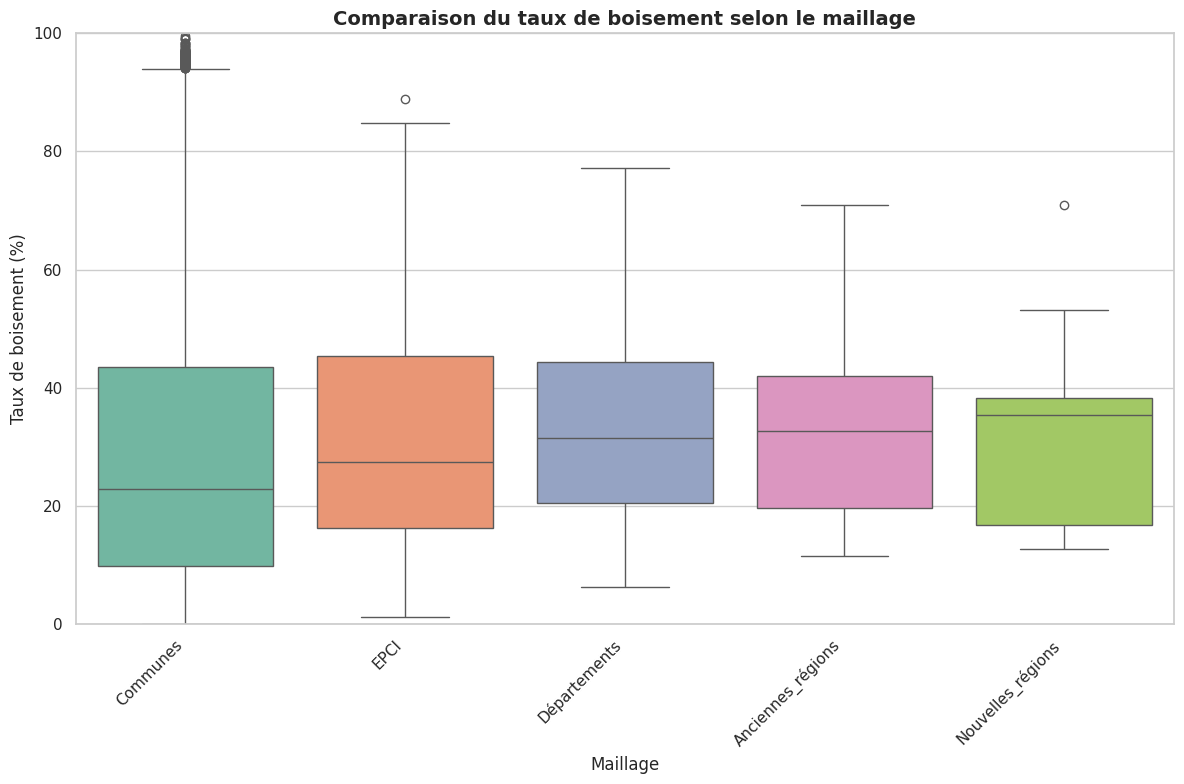

In [33]:
# Créer un dictionnaire avec toutes les données
data_dict = {
    'Communes': com_foret['txbois'],
    'EPCI': epci_foret['txbois'],
    'Départements': dep_foret['txbois'],
    'Anciennes_régions': oldreg_foret['txbois'],
    'Nouvelles_régions': reg_foret['txbois']
}

# Créer un tableau de synthèse des statistiques
summary_stats = pd.DataFrame({
    'Maillage': list(data_dict.keys()),
    'Moyenne': [data.mean() for data in data_dict.values()],
    'Médiane': [data.median() for data in data_dict.values()],
    'Écart-type': [data.std() for data in data_dict.values()]
})

print(summary_stats)

# Préparer les données pour seaborn avec pd.concat() et melt() - MÉTHODE SIMPLIFIÉE
# Créer un DataFrame avec concat, puis utiliser melt pour le format long
df_long = pd.concat(data_dict, names=['Niveau', 'index']).reset_index(name='Taux de boisement (%)')
df_long = df_long[['Niveau', 'Taux de boisement (%)']]  # Garder seulement les colonnes utiles

# Créer les boxplots comparatifs avec seaborn (beaucoup plus simple !)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(data=df_long, x='Niveau', y='Taux de boisement (%)', ax=ax, palette='Set2')
ax.set_title('Comparaison du taux de boisement selon le maillage', fontsize=14, fontweight='bold')
ax.set_xlabel('Maillage', fontsize=12)
ax.set_ylabel('Taux de boisement (%)', fontsize=12)
ax.set_ylim(0, 100)  # Fixer les limites de l'axe y pour faciliter la comparaison
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.7 - Questions

> `📝` **Question 1 :** Que constatez-vous sur l'évolution de la moyenne du taux de boisement selon l'échelle ?
>
> `📝` **Question 2 :** Comment évolue la dispersion (écart-type) selon le niveau d'agrégation ? Pourquoi ?
>
> `📝` **Question 3 :** Quel lien faites-vous entre ces observations et le MAUP ?


**Réponses :**

1. La moyenne du taux de boisement reste relativement stable quelle que soit l'échelle d'agrégation (autour de 30-32%), car c'est une propriété extensive qui se conserve par agrégation.

2. L'écart-type diminue fortement à mesure que l'échelle d'agrégation augmente. Cela s'explique par le phénomène d'agrégation : en regroupant les données sur des zones plus vastes, on moyenne les valeurs extrêmes et on lisse les variations locales. L'écart-type passe d'environ 20-25% pour les communes à environ 5-8% pour les régions.

3. Ces observations illustrent parfaitement l'effet d'échelle du MAUP : le choix de l'échelle d'analyse modifie les caractéristiques statistiques de la distribution (notamment la dispersion), ce qui peut conduire à des interprétations différentes du phénomène spatial étudié.



**Synthèse :**

Ce TD a permis de mettre en évidence plusieurs manifestations du MAUP :

### Effet d'échelle observé

- **Lissage progressif** : À mesure que l'échelle d'agrégation augmente (de la commune vers la région), les variations spatiales locales s'estompent. Les cartes deviennent plus homogènes et les contrastes s'atténuent.

- **Réduction de la variabilité** : L'écart-type du taux de boisement diminue fortement avec l'augmentation du niveau d'agrégation (de ~20-25% pour les communes à ~5-8% pour les régions). Cette réduction de dispersion est une conséquence directe du processus de moyennage inhérent à l'agrégation.

- **Conservation des tendances générales** : Malgré ces changements, certaines grandes structures spatiales (zones très boisées comme les Landes ou le Massif Central) restent identifiables à toutes les échelles.

### Effet de zonage

- En comparant les anciennes et nouvelles régions (même niveau d'agrégation, découpages différents), on observe que le redessin des limites administratives modifie légèrement les valeurs calculées. Cela démontre que la forme et la configuration des unités spatiales influencent les résultats, indépendamment de l'échelle.

### Impact sur l'interprétation

- **Problème de l'agrégation naïve** : La comparaison entre moyenne arithmétique et taux recalculé montre qu'une agrégation incorrecte (ne tenant pas compte des surfaces) peut conduire à des biais dans l'estimation des taux régionaux.

- **Perte d'information** : L'agrégation fait disparaître les informations sur l'hétérogénéité interne des unités spatiales. À l'échelle régionale, on ne peut plus identifier les poches locales de forte ou faible densité forestière.

- **Risque d'erreur écologique** : Les conclusions tirées à une échelle ne sont pas nécessairement valides à une autre échelle. Une politique forestière pertinente à l'échelle régionale pourrait être inadaptée à l'échelle communale.

### Implications pour l'analyse spatiale

1. **Pas d'échelle universellement "correcte"** : Le choix de l'échelle d'analyse doit être guidé par la question de recherche et les objectifs de l'étude, pas seulement par la disponibilité des données.

2. **Nécessité de l'analyse multi-échelle** : Pour bien comprendre un phénomène spatial, il est souvent nécessaire de l'examiner à plusieurs échelles et de comparer les résultats.

3. **Transparence méthodologique** : Il est crucial de documenter précisément l'échelle d'analyse utilisée et de discuter les limites liées au MAUP dans toute étude spatiale.

4. **Attention aux méthodes d'agrégation** : Le choix de la méthode d'agrégation (moyenne simple, pondérée, médiane, etc.) a des conséquences importantes sur les résultats.



**Recommandations :**

### Pour une étude utilisant des données agrégées :

1. **Travailler à l'échelle la plus fine possible** : Privilégier les données à l'échelle la plus désagrégée disponible. Il est toujours possible d'agréger ensuite, mais impossible de désagréger.

2. **Documenter systématiquement l'échelle** : Préciser clairement l'échelle spatiale d'analyse dans tous les résultats, tableaux et cartes. Éviter les généralisations abusives.

3. **Réaliser une analyse de sensibilité** : Tester l'effet de différentes échelles ou découpages sur les résultats pour évaluer la robustesse des conclusions.

4. **Utiliser des méthodes d'agrégation appropriées** :
   - Pour les variables extensives (surfaces, populations) : somme
   - Pour les variables intensives (taux, densités, ratios) : moyenne pondérée ou recalcul à partir des sommes
   - Éviter la moyenne arithmétique simple pour les ratios

5. **Visualiser les données à plusieurs échelles** : Créer des cartes à différents niveaux d'agrégation pour mieux comprendre la structure spatiale du phénomène.

### Pour limiter les effets du MAUP :

1. **Approches par lissage spatial** :
   - Utiliser des techniques de lissage (kernel density, moving windows) pour créer des représentations continues qui ne dépendent pas des découpages administratifs
   - Utiliser des bibliothèques comme `scipy.ndimage` ou `sklearn.neighbors.KernelDensity`

2. **Analyse multi-échelle systématique** :
   - Intégrer l'analyse à plusieurs échelles dans le protocole d'étude
   - Documenter comment les conclusions varient selon l'échelle

3. **Modélisation hiérarchique** :
   - Utiliser des modèles multiniveaux qui prennent explicitement en compte la structure hiérarchique des données spatiales
   - Explorer les méthodes bayésiennes pour combiner informations à différentes échelles

4. **Méthodes de régression spatiale** :
   - Utiliser des régressions géographiquement pondérées (GWR) qui permettent aux relations de varier dans l'espace
   - Appliquer des modèles d'autocorrélation spatiale

5. **Combinaison de données** :
   - Croiser données agrégées et données individuelles ou ponctuelles quand c'est possible
   - Utiliser des données auxiliaires à échelle fine pour valider les résultats agrégés

6. **Transparence et prudence** :
   - Toujours discuter explicitement des limites liées au MAUP dans l'interprétation des résultats
   - Éviter les conclusions causales trop fortes basées uniquement sur des données agrégées
   - Être particulièrement prudent avec les analyses de corrélation (risque de corrélation écologique)



---

# Fin du TD

## Pour aller plus loin

Vous pouvez explorer :

1. **L'autocorrélation spatiale** : Comment évolue-t-elle selon l'échelle d'agrégation ? (indices de Moran, Geary) - Utilisez `esda` de PySAL

2. **Les corrélations bivariées** : Si vous avez d'autres variables (population, revenus), comment évoluent les corrélations avec le taux de boisement selon l'échelle ?

3. **Le lissage spatial** : Appliquez un lissage spatial pour vous affranchir des découpages administratifs - Utilisez `scipy.ndimage` ou KernelDensity de sklearn

4. **Différentes méthodes d'agrégation** : Testez différentes méthodes (moyennes pondérées, médianes, etc.)

N'oubliez pas de consulter la présentation du cours pour réviser les concepts théoriques du MAUP !

